# Oasis Infobytes : Data Science Internship

### Task 4 : To build an email spam detector machine learning model to detect the mail is spam or non-spam

#### Intern name : Disha Satish Jadhav
#### February- P2 Batch Oasis Infobyte SIP

#### Step 1 : Data loading

In [1]:
import pandas as pd
import numpy as np


In [2]:
raw_data = pd.read_csv("spam.csv", encoding="latin-1")
raw_data

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN
...,...,...,...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...,NaN,NaN,NaN
5568,ham,Will Ì_ b going to esplanade fr home?,NaN,NaN,NaN
5569,ham,"Pity, * was in mood for that. So...any other s...",NaN,NaN,NaN
5570,ham,The guy did some bitching but I acted like i'd...,NaN,NaN,NaN


#### Step 2 : Data Cleaning

In [3]:
raw_data.columns

Index(['v1', 'v2', 'Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'], dtype='object')

In [4]:
raw_data.drop(['Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'],axis=1,inplace=True)

In [5]:
raw_data.head(30)

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
5,spam,FreeMsg Hey there darling it's been 3 week's n...
6,ham,Even my brother is not like to speak with me. ...
7,ham,As per your request 'Melle Melle (Oru Minnamin...
8,spam,WINNER!! As a valued network customer you have...
9,spam,Had your mobile 11 months or more? U R entitle...


In [6]:
raw_data.rename(columns={'v1':'target','v2':'mails'},inplace =True)
raw_data

,target,mails
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will Ì_ b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


In [7]:
raw_data.isnull().sum()

target    0
mails     0
dtype: int64

In [8]:
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   target  5572 non-null   object
 1   mails   5572 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB


In [9]:
raw_data.shape

(5572, 2)

In [10]:
# To Check duplicate values in dataset
raw_data.duplicated().sum()

403

In [11]:
raw_data =raw_data.drop_duplicates(keep='first')

In [12]:
raw_data.duplicated().sum()

0

#### Step 3 : Exploratory data analysis

In [13]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

In [14]:
raw_data['target'] = encoder.fit_transform(raw_data['target'])

C:\Users\disha\AppData\Local\Temp\ipykernel_1812\3306921805.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  raw_data['target'] = encoder.fit_transform(raw_data['target'])


In [15]:
raw_data.head()

,target,mails
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [16]:
raw_data['target'].value_counts()

0    4516
1     653
Name: target, dtype: int64

In [17]:
import matplotlib.pyplot as plt

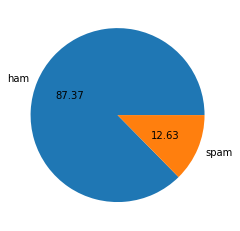

In [18]:
plt.pie(raw_data['target'].value_counts(), labels = ['ham','spam'],autopct="%0.2f")
plt.show()

- From above pie chart it is seen that 87.37% email are ham thus 12.63% mail are spam

#### Step 4 : Performing Navie Bayesian

In [19]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import confusion_matrix
from sklearn import metrics
from sklearn.naive_bayes import MultinomialNB

In [20]:
X = raw_data['target']
y = raw_data['mails']

In [21]:
print(X)

0       0
1       0
2       1
3       0
4       0
       ..
5567    1
5568    0
5569    0
5570    0
5571    0
Name: target, Length: 5169, dtype: int32


In [22]:
X_train,X_test,y_train,y_test=train_test_split(raw_data.target, raw_data.mails , test_size = 0.25)

In [23]:
cv = CountVectorizer()
y_train_count = cv.fit_transform(y_train.values)

In [24]:
y_train_count.toarray()

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [25]:
# To analyze the model
model = MultinomialNB()
model.fit(y_train_count, X_train)

MultinomialNB()

In [26]:
# To test it is ham mail or not
mail_ham = ["I HAVE A DATE ON SUNDAY WITH WILL!!"]
mail_ham_count = cv.transform(mail_ham)
model.predict(mail_ham_count)

array([0])

- The array is 0 that is the email is not spam hence it is ham mail

In [27]:
# To test it is spam mail or not
mail_spam = ["Did you hear about the new \Divorce Barbie\"? It comes with all of Ken's stuff!"]
mail_spam_count = cv.transform(mail_spam)
model.predict(mail_spam_count)

array([0])

- The array is 0 that is the email is not ham hence it is spam mail

In [28]:
y_test_count = cv.transform(y_test)
model.score(y_test_count, X_test)

0.9922660479505027

- Hence the model has 99 % accuracy thus model is good

#### Step 5 : Performing Logistic Regression

In [29]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [30]:
X = raw_data['mails']
y = raw_data['target']

In [31]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size = 0.2, random_state = 3)

In [32]:
feature_extraction = TfidfVectorizer(min_df = 1, stop_words = 'english', lowercase ='True')

In [33]:
print(X)

0       Go until jurong point, crazy.. Available only ...
1                           Ok lar... Joking wif u oni...
2       Free entry in 2 a wkly comp to win FA Cup fina...
3       U dun say so early hor... U c already then say...
4       Nah I don't think he goes to usf, he lives aro...
                              ...                        
5567    This is the 2nd time we have tried 2 contact u...
5568                Will Ì_ b going to esplanade fr home?
5569    Pity, * was in mood for that. So...any other s...
5570    The guy did some bitching but I acted like i'd...
5571                           Rofl. Its true to its name
Name: mails, Length: 5169, dtype: object


In [34]:
y_train = y_train.astype('int')
y_test = y_test.astype('int')

In [35]:
X_train_features = feature_extraction.fit_transform(X_train)
X_test_features = feature_extraction.transform(X_test)

In [36]:
print(X_train)

4443                       COME BACK TO TAMPA FFFFUUUUUUU
982     Congrats! 2 mobile 3G Videophones R yours. cal...
3822    Please protect yourself from e-threats. SIB ne...
3924       As if i wasn't having enough trouble sleeping.
4927    Just hopeing that wasnÛ÷t too pissed up to re...
                              ...                        
806      sure, but make sure he knows we ain't smokin yet
990                                          26th OF JULY
1723    Hi Jon, Pete here, Ive bin 2 Spain recently & ...
3519    No it will reach by 9 only. She telling she wi...
1745    IåÕm cool ta luv but v.tired 2 cause i have be...
Name: mails, Length: 4135, dtype: object


In [37]:
print(X_train_features)

  (0, 2697)	0.7205755344386542
  (0, 6409)	0.5950532917415522
  (0, 1825)	0.35592482233751443
  (1, 5438)	0.27399320458839144
  (1, 4583)	0.27399320458839144
  (1, 4438)	0.22516921191243092
  (1, 5036)	0.27399320458839144
  (1, 2274)	0.27399320458839144
  (1, 2920)	0.23390504161994488
  (1, 3610)	0.27399320458839144
  (1, 4984)	0.19732502227978832
  (1, 4180)	0.23390504161994488
  (1, 7137)	0.24133495616477563
  (1, 6940)	0.27399320458839144
  (1, 203)	0.27399320458839144
  (1, 6941)	0.27399320458839144
  (1, 453)	0.25698446420786897
  (1, 4333)	0.15929709793058355
  (1, 1885)	0.22516921191243092
  (2, 953)	0.26160275768603725
  (2, 4856)	0.26160275768603725
  (2, 5786)	0.26160275768603725
  (2, 2459)	0.22436535516409714
  (2, 4960)	0.26160275768603725
  (2, 5976)	0.1902832473629628
  :	:
  (4132, 6862)	0.11085392369947865
  (4132, 5612)	0.14854309693836068
  (4132, 3865)	0.16898098428277844
  (4133, 6457)	0.6154177820886059
  (4133, 5320)	0.5530764956488926
  (4133, 2311)	0.4238274869

In [38]:
# Training the Ml Logistic regression model
model = LogisticRegression()

In [39]:
model.fit(X_train_features, y_train)

LogisticRegression()

In [40]:
predict_train_data = model.predict(X_train_features)
accuracy_train_data = accuracy_score(y_train, predict_train_data)

In [41]:
print('accuracy_train_data:', accuracy_train_data)

accuracy_train_data: 0.962273276904474


- The accuracy for training data is 96%

In [42]:
predict_test_data = model.predict(X_test_features)
accuracy_test_data = accuracy_score(y_test, predict_test_data)

In [43]:
print('accuracy_test_data:', accuracy_test_data)

accuracy_test_data: 0.960348162475822


- The accuracy for test data is 96%

## Thank You !